In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data = pd.read_csv("training data1.csv")
data.shape

(17998, 25)

In [8]:
data.corr()['fraud'].sort_values(ascending = False)

fraud                      1.000000
past_num_of_claims         0.118596
address_change_ind         0.072249
age_of_vehicle             0.052197
policy_report_filed_ind    0.030132
vehicle_weight             0.009484
claim_number               0.007354
liab_prct                  0.001463
vehicle_price              0.000746
claim_est_payout          -0.016708
zip_code                  -0.032322
annual_income             -0.045646
safty_rating              -0.050729
age_of_driver             -0.059291
witness_present_ind       -0.074150
marital_status            -0.078435
high_education_ind        -0.098350
Name: fraud, dtype: float64

<AxesSubplot:>

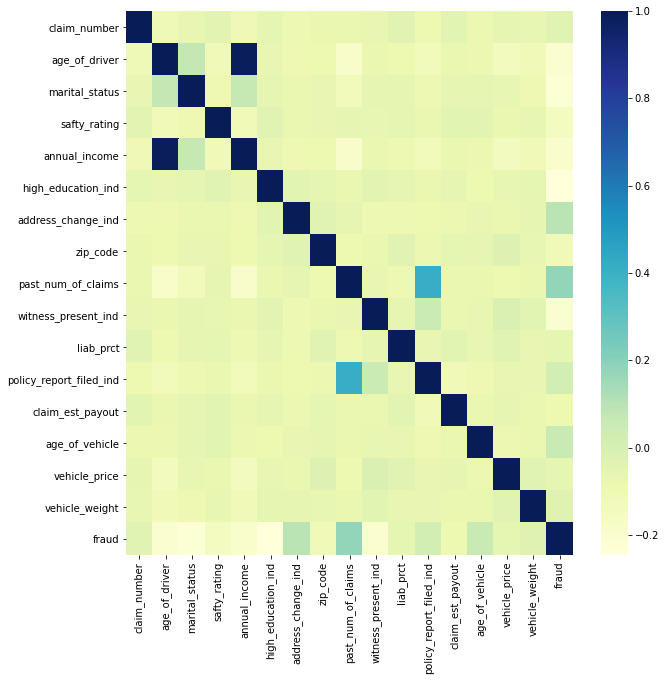

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr().corr(),cmap="YlGnBu")

In [26]:
data.dtypes

claim_number                 int64
age_of_driver                int64
gender                      object
marital_status             float64
safty_rating                 int64
annual_income                int64
high_education_ind           int64
address_change_ind           int64
living_status               object
zip_code                     int64
claim_date                  object
claim_day_of_week           object
accident_site               object
past_num_of_claims           int64
witness_present_ind        float64
liab_prct                    int64
channel                     object
policy_report_filed_ind      int64
claim_est_payout           float64
age_of_vehicle             float64
vehicle_category            object
vehicle_price              float64
vehicle_color               object
vehicle_weight             float64
fraud                        int64
dtype: object

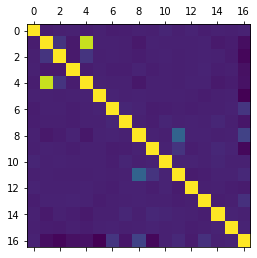

In [60]:
plt.matshow(data.corr())
plt.show()

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17998 entries, 0 to 17997
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   claim_number             17998 non-null  int64  
 1   age_of_driver            17998 non-null  int64  
 2   gender                   17998 non-null  object 
 3   marital_status           17993 non-null  float64
 4   safty_rating             17998 non-null  int64  
 5   annual_income            17998 non-null  int64  
 6   high_education_ind       17998 non-null  int64  
 7   address_change_ind       17998 non-null  int64  
 8   living_status            17998 non-null  object 
 9   zip_code                 17998 non-null  int64  
 10  claim_date               17998 non-null  object 
 11  claim_day_of_week        17998 non-null  object 
 12  accident_site            17998 non-null  object 
 13  past_num_of_claims       17998 non-null  int64  
 14  witness_present_ind   

In [4]:
data.drop(columns=['claim_number','zip_code', 'claim_date'], inplace=True)

In [5]:
data.nunique()

age_of_driver                 87
gender                         2
marital_status                 2
safty_rating                 100
annual_income               2693
high_education_ind             2
address_change_ind             2
living_status                  2
claim_day_of_week              7
accident_site                  3
past_num_of_claims             7
witness_present_ind            2
liab_prct                    101
channel                        3
policy_report_filed_ind        2
claim_est_payout           17981
age_of_vehicle                17
vehicle_category               3
vehicle_price              17998
vehicle_color                  7
vehicle_weight             17998
fraud                          2
dtype: int64

In [6]:
data.isnull().sum(axis=0)

age_of_driver                0
gender                       0
marital_status               5
safty_rating                 0
annual_income                0
high_education_ind           0
address_change_ind           0
living_status                0
claim_day_of_week            0
accident_site                0
past_num_of_claims           0
witness_present_ind        132
liab_prct                    0
channel                      0
policy_report_filed_ind      0
claim_est_payout            17
age_of_vehicle               8
vehicle_category             0
vehicle_price                0
vehicle_color                0
vehicle_weight               0
fraud                        0
dtype: int64

In [11]:
def witness_column_transform(x):
    if x == 1:
        return 'Has_witness'
    elif x == 0:
        return 'No_witness'
    else:
        return 'Missing_witness'
data['witness_present_ind'] = data['witness_present_ind'].map(witness_column_transform)

In [12]:
data[['age_of_driver','gender','marital_status','safty_rating','annual_income','high_education_ind','address_change_ind','living_status','claim_day_of_week','accident_site','past_num_of_claims','witness_present_ind','liab_prct','channel','policy_report_filed_ind','claim_est_payout','age_of_vehicle','vehicle_category','vehicle_price','vehicle_color','vehicle_weight']].describe()

,age_of_driver,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,past_num_of_claims,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight
count,17998.000000,17993.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17981.000000,17990.000000,17998.000000,17998.000000
mean,43.695466,0.712722,73.562951,37367.655684,0.699189,0.577286,0.505001,49.423269,0.600678,4975.792083,5.008060,23089.123114,23031.322385
std,11.959819,0.452505,15.346807,2957.297249,0.458623,0.494004,0.955504,33.678470,0.489773,2215.706510,2.258391,11988.429767,12052.385584
min,18.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,282.639432,0.000000,2457.329316,2429.429302
25%,35.000000,0.000000,65.000000,35554.000000,0.000000,0.000000,0.000000,17.000000,0.000000,3337.029436,3.000000,14279.574850,14164.122133
50%,43.000000,1.000000,76.000000,37610.000000,1.000000,1.000000,0.000000,50.000000,1.000000,4668.796318,5.000000,20948.879250,20838.150260
75%,51.000000,1.000000,85.000000,39318.000000,1.000000,1.000000,1.000000,81.000000,1.000000,6255.901066,6.000000,29562.232780,29430.446293
max,229.000000,1.000000,100.000000,54333.000000,1.000000,1.000000,6.000000,100.000000,1.000000,17218.345010,16.000000,127063.506000,123016.650400


<AxesSubplot:xlabel='fraud', ylabel='vehicle_weight'>

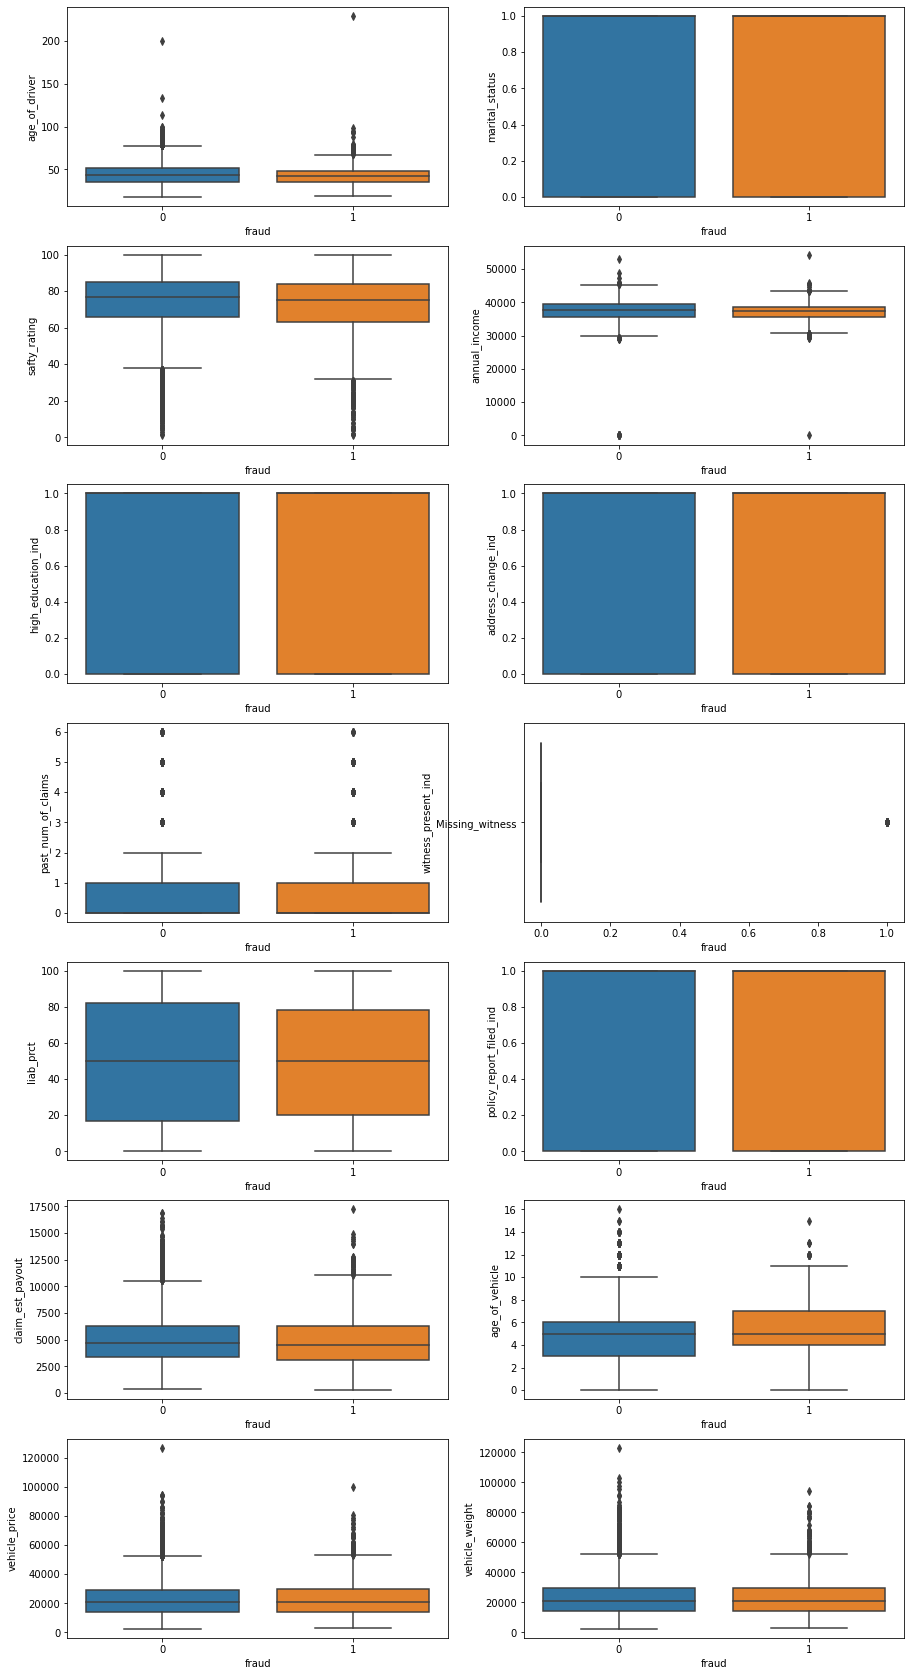

In [13]:
_,axss = plt.subplots(7,2, figsize=[15,30])
sns.boxplot(x='fraud', y ='age_of_driver', data=data, ax=axss[0][0])
sns.boxplot(x='fraud', y ='marital_status', data=data, ax=axss[0][1])
sns.boxplot(x='fraud', y ='safty_rating', data=data, ax=axss[1][0])
sns.boxplot(x='fraud', y ='annual_income', data=data, ax=axss[1][1])
sns.boxplot(x='fraud', y ='high_education_ind', data=data, ax=axss[2][0])
sns.boxplot(x='fraud', y ='address_change_ind', data=data, ax=axss[2][1])
sns.boxplot(x='fraud', y ='past_num_of_claims', data=data, ax=axss[3][0])
sns.boxplot(x='fraud', y ='witness_present_ind', data=data, ax=axss[3][1])
sns.boxplot(x='fraud', y ='liab_prct', data=data, ax=axss[4][0])
sns.boxplot(x='fraud', y ='policy_report_filed_ind', data=data, ax=axss[4][1])
sns.boxplot(x='fraud', y ='claim_est_payout', data=data, ax=axss[5][0])
sns.boxplot(x='fraud', y ='age_of_vehicle', data=data, ax=axss[5][1])
sns.boxplot(x='fraud', y ='vehicle_price', data=data, ax=axss[6][0])
sns.boxplot(x='fraud', y ='vehicle_weight', data=data, ax=axss[6][1])